In [1]:
task_name = 'all_data'

In [2]:
model_path = './models/{0}/'.format(task_name)

In [3]:
import os
import numpy as np
import pandas as pd

import warnings
from tqdm import tqdm

# Model Creation for Tasks captured through Openface

1. First we create the training data from the task participant data

       This results in three intermediate training CSVs stored to disk.

2. Next we train the PCA models

        This results in pickled PCA models.
        
3. Then we train a k-means cluster that sits on top of PCA 

        This results in pickled k-means model.

4. Next we train an autoencoder model (as replacement for PCA)

        This results in saved autoencoder model.


In [3]:


path = './data/openface'
tasks = ['task1_sandwich_openface','task2_bart_openface','task3_jenga_openface']

files = []
for task in tasks:
    subpath = os.path.join(path,task)
    files += [os.path.join(task,f) for f in os.listdir(subpath) if os.path.isfile(os.path.join(subpath,f))]

print('Num Files:',len(files))

Num Files: 93


## Create training set
Using k out of every file?

Note dropping bad lines

In [4]:
from sklearn.model_selection import train_test_split

indicies = ['frame'] + ['x_{0}'.format(i) for i in range(0,68)] + ['y_{0}'.format(i) for i in range(0,68)]

flag = True
Train = None
Test = None
Valid = None

for f in tqdm(list(files)):
    
    # Load CSV
    print(f)
    df = pd.read_csv(
            os.path.join(path,f), 
            error_bad_lines=False, 
            warn_bad_lines=True)
    
    face_lmk = df[indicies]
    
    # Filter NaN rows
    nans = df[df[indicies].isnull().any(axis=1)]
    if not nans.empty:
        dropList = nans.index.tolist()
        for r in dropList:
            warnings.warn('Dropping row due to NaN, {0}'.format(r))
        face_lmk.drop(dropList, inplace=True)
        
    face_lmk.insert(0,'filename',[f for i in range(0,face_lmk.shape[0])],True)
        
    print('Full:',face_lmk.shape)
    
    # Create Training, Test, Validation subsets
    train, tmp = train_test_split(face_lmk, test_size=0.33)
    test, val = train_test_split(tmp, test_size=0.5)
    print('Train:',train.shape,'Test:',test.shape,'Validation',val.shape)
    
    if flag:
        flag = False
        Train = train
        Test = test
        Valid = val
    else:
        Train = Train.append(train)
        Test = Test.append(test)
        Valid = Valid.append(val)

# Final Dataset (shuffled)
Train = Train.sample(frac=1).reset_index(drop=True)
Test = Test.sample(frac=1).reset_index(drop=True)
Valid = Valid.sample(frac=1).reset_index(drop=True)

print('\n\nFINAL')
print('Train:',Train.shape,'Test:',Test.shape,'Validation',Valid.shape)

  0%|          | 0/93 [00:00<?, ?it/s]

task1_sandwich_openface/1101_sandwich_cut.csv


  1%|          | 1/93 [00:02<03:27,  2.26s/it]

Full: (10804, 138)
Train: (7238, 138) Test: (1783, 138) Validation (1783, 138)
task1_sandwich_openface/Sona0401_sandwich_cut.csv


  2%|▏         | 2/93 [00:03<02:26,  1.61s/it]

Full: (5606, 138)
Train: (3756, 138) Test: (925, 138) Validation (925, 138)
task1_sandwich_openface/0201_sandwich_cut.csv


  3%|▎         | 3/93 [00:06<03:05,  2.06s/it]

Full: (9953, 138)
Train: (6668, 138) Test: (1642, 138) Validation (1643, 138)
task1_sandwich_openface/0901_sandwich_cut.csv


  4%|▍         | 4/93 [00:08<03:30,  2.37s/it]

Full: (13190, 138)
Train: (8837, 138) Test: (2176, 138) Validation (2177, 138)
task1_sandwich_openface/1501_sandwich_cut.csv


  5%|▌         | 5/93 [00:10<03:04,  2.09s/it]

Full: (7224, 138)
Train: (4840, 138) Test: (1192, 138) Validation (1192, 138)
task1_sandwich_openface/0102_sandwich_cut.csv


  6%|▋         | 6/93 [00:11<02:38,  1.83s/it]

Full: (5692, 138)
Train: (3813, 138) Test: (939, 138) Validation (940, 138)
task1_sandwich_openface/0301_sandwich_cut.csv


  8%|▊         | 7/93 [00:13<02:30,  1.75s/it]

Full: (8261, 138)
Train: (5534, 138) Test: (1363, 138) Validation (1364, 138)
task1_sandwich_openface/1001_sandwich_cut.csv


  9%|▊         | 8/93 [00:14<02:23,  1.69s/it]

Full: (8028, 138)
Train: (5378, 138) Test: (1325, 138) Validation (1325, 138)
task1_sandwich_openface/0101_sandwich_cut.csv


 10%|▉         | 9/93 [00:16<02:09,  1.54s/it]

Full: (5732, 138)
Train: (3840, 138) Test: (946, 138) Validation (946, 138)
task1_sandwich_openface/0802_sandwich_cut.csv


 11%|█         | 10/93 [00:18<02:22,  1.72s/it]

Full: (11239, 138)
Train: (7530, 138) Test: (1854, 138) Validation (1855, 138)
task1_sandwich_openface/sona0102_sandwich_cut.csv


 12%|█▏        | 11/93 [00:19<02:12,  1.62s/it]

Full: (4735, 138)
Train: (3172, 138) Test: (781, 138) Validation (782, 138)
task1_sandwich_openface/0702_sandwich_cut.csv


 13%|█▎        | 12/93 [00:21<02:10,  1.61s/it]

Full: (8501, 138)
Train: (5695, 138) Test: (1403, 138) Validation (1403, 138)
task1_sandwich_openface/0801_sandwich_cut.csv


 14%|█▍        | 13/93 [00:23<02:22,  1.78s/it]

Full: (11169, 138)
Train: (7483, 138) Test: (1843, 138) Validation (1843, 138)
task1_sandwich_openface/0601_sandwich_cut.csv


 15%|█▌        | 14/93 [00:25<02:28,  1.88s/it]

Full: (11538, 138)
Train: (7730, 138) Test: (1904, 138) Validation (1904, 138)
task1_sandwich_openface/Sona0402_sandwich_cut.csv


 16%|█▌        | 15/93 [00:26<02:10,  1.67s/it]

Full: (6001, 138)
Train: (4020, 138) Test: (990, 138) Validation (991, 138)
task1_sandwich_openface/0502_sandwich_cut.csv


 17%|█▋        | 16/93 [00:28<02:10,  1.70s/it]

Full: (9457, 138)
Train: (6336, 138) Test: (1560, 138) Validation (1561, 138)
task1_sandwich_openface/1002_sandwich_cut.csv


 18%|█▊        | 17/93 [00:30<02:10,  1.72s/it]

Full: (8236, 138)
Train: (5518, 138) Test: (1359, 138) Validation (1359, 138)
task1_sandwich_openface/0701_sandwich_cut.csv


 19%|█▉        | 18/93 [00:31<02:09,  1.72s/it]

Full: (8250, 138)
Train: (5527, 138) Test: (1361, 138) Validation (1362, 138)
task1_sandwich_openface/sona0101_sandwich_cut.csv


 20%|██        | 19/93 [00:33<01:56,  1.57s/it]

Full: (4700, 138)
Train: (3149, 138) Test: (775, 138) Validation (776, 138)
task1_sandwich_openface/Sona0201_sandwich_cut.csv


 22%|██▏       | 20/93 [00:34<01:54,  1.57s/it]

Full: (6358, 138)
Train: (4259, 138) Test: (1049, 138) Validation (1050, 138)
task1_sandwich_openface/1301_sandwich_cut.csv


b'Skipping line 4053: expected 714 fields, saw 1233\nSkipping line 4064: expected 714 fields, saw 722\n'
<ipython-input-4-e7f92ee2bc6c>:26: UserWarning: Dropping row due to NaN, 6548
  warnings.warn('Dropping row due to NaN, {0}'.format(r))
<ipython-input-4-e7f92ee2bc6c>:26: UserWarning: Dropping row due to NaN, 6552
  warnings.warn('Dropping row due to NaN, {0}'.format(r))
/home/curt/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
 23%|██▎       | 21/93 [00:36<01:50,  1.53s/it]

Full: (6570, 138)
Train: (4401, 138) Test: (1084, 138) Validation (1085, 138)
task1_sandwich_openface/1701_Sandwich_Cut.csv


 24%|██▎       | 22/93 [00:37<01:45,  1.49s/it]

Full: (6185, 138)
Train: (4143, 138) Test: (1021, 138) Validation (1021, 138)
task1_sandwich_openface/1702_Sandwich_Cut.csv


 25%|██▍       | 23/93 [00:38<01:41,  1.46s/it]

Full: (6674, 138)
Train: (4471, 138) Test: (1101, 138) Validation (1102, 138)
task1_sandwich_openface/Sona0202_sandwich_cut.csv
Full: (6405, 138)
Train: (4291, 138) Test: (1057, 138) Validation (1057, 138)


 26%|██▌       | 24/93 [00:40<01:41,  1.48s/it]

task1_sandwich_openface/1401_sandwich_cut.csv


 27%|██▋       | 25/93 [00:42<01:43,  1.52s/it]

Full: (7476, 138)
Train: (5008, 138) Test: (1234, 138) Validation (1234, 138)
task1_sandwich_openface/1502_sandwich_cut.csv


 28%|██▊       | 26/93 [00:43<01:43,  1.54s/it]

Full: (7219, 138)
Train: (4836, 138) Test: (1191, 138) Validation (1192, 138)
task1_sandwich_openface/0402_sandwich_cut.csv


 29%|██▉       | 27/93 [00:44<01:33,  1.41s/it]

Full: (4974, 138)
Train: (3332, 138) Test: (821, 138) Validation (821, 138)
task1_sandwich_openface/1402_sandwich_cut.csv


 30%|███       | 28/93 [00:46<01:36,  1.48s/it]

Full: (7518, 138)
Train: (5037, 138) Test: (1240, 138) Validation (1241, 138)
task1_sandwich_openface/0302_sandwich_cut.csv
Full: (8333, 138)
Train: (5583, 138) Test: (1375, 138) Validation (1375, 138)


 31%|███       | 29/93 [00:48<01:39,  1.56s/it]

task1_sandwich_openface/Sona0302_sandwich_cut.csv


 32%|███▏      | 30/93 [00:49<01:41,  1.61s/it]

Full: (7300, 138)
Train: (4891, 138) Test: (1204, 138) Validation (1205, 138)
task1_sandwich_openface/0501_sandwich_cut.csv
Full: (9426, 138)
Train: (6315, 138) Test: (1555, 138) Validation (1556, 138)


 33%|███▎      | 31/93 [00:51<01:47,  1.73s/it]

task1_sandwich_openface/0602_sandwich_cut.csv
Full: (10711, 138)
Train: (7176, 138) Test: (1767, 138) Validation (1768, 138)


 34%|███▍      | 32/93 [00:54<01:55,  1.89s/it]

task2_bart_openface/0501_bart_cut.csv
Full: (29969, 138)
Train: (20079, 138) Test: (4945, 138) Validation (4945, 138)


 35%|███▌      | 33/93 [01:00<03:09,  3.16s/it]

task2_bart_openface/Sona0301_bart_cut.csv
Full: (25035, 138)
Train: (16773, 138) Test: (4131, 138) Validation (4131, 138)


 37%|███▋      | 34/93 [01:05<03:40,  3.74s/it]

task2_bart_openface/0101_bart_cut.csv
Full: (11665, 138)
Train: (7815, 138) Test: (1925, 138) Validation (1925, 138)


 38%|███▊      | 35/93 [01:08<03:18,  3.43s/it]

task2_bart_openface/1401_bart_cut.csv
Full: (17045, 138)
Train: (11420, 138) Test: (2812, 138) Validation (2813, 138)


 39%|███▊      | 36/93 [01:15<04:16,  4.50s/it]

task2_bart_openface/0102_bart_cut.csv
Full: (10487, 138)
Train: (7026, 138) Test: (1730, 138) Validation (1731, 138)


 40%|███▉      | 37/93 [01:17<03:43,  3.99s/it]

task2_bart_openface/1702_Bart_Cut.csv
Full: (18037, 138)
Train: (12084, 138) Test: (2976, 138) Validation (2977, 138)


 41%|████      | 38/93 [01:22<03:51,  4.21s/it]

task2_bart_openface/Sona0402_bart_cut.csv
Full: (7828, 138)
Train: (5244, 138) Test: (1292, 138) Validation (1292, 138)


 42%|████▏     | 39/93 [01:25<03:26,  3.82s/it]

task2_bart_openface/Sona0201_bart_cut.csv
Full: (13937, 138)
Train: (9337, 138) Test: (2300, 138) Validation (2300, 138)


 43%|████▎     | 40/93 [01:29<03:22,  3.83s/it]

task2_bart_openface/1302_bart_cut.csv
Full: (12961, 138)
Train: (8683, 138) Test: (2139, 138) Validation (2139, 138)


 44%|████▍     | 41/93 [01:32<03:11,  3.68s/it]

task2_bart_openface/1701_Bart_Cut .csv
Full: (17671, 138)
Train: (11839, 138) Test: (2916, 138) Validation (2916, 138)


 45%|████▌     | 42/93 [01:37<03:17,  3.87s/it]

task2_bart_openface/Sona0302_bart_cut.csv
Full: (25085, 138)
Train: (16806, 138) Test: (4139, 138) Validation (4140, 138)


 46%|████▌     | 43/93 [01:43<03:45,  4.50s/it]

task2_bart_openface/0302_bart_cut.csv
Full: (19035, 138)
Train: (12753, 138) Test: (3141, 138) Validation (3141, 138)


 47%|████▋     | 44/93 [01:47<03:40,  4.49s/it]

task2_bart_openface/Sona0202_bart_cut.csv
Full: (13904, 138)
Train: (9315, 138) Test: (2294, 138) Validation (2295, 138)


 48%|████▊     | 45/93 [01:50<03:19,  4.15s/it]

task2_bart_openface/0701_bart_cut.csv
Full: (12787, 138)
Train: (8567, 138) Test: (2110, 138) Validation (2110, 138)


 49%|████▉     | 46/93 [01:54<03:04,  3.92s/it]

task2_bart_openface/1301_bart_cut.csv
Full: (12346, 138)
Train: (8271, 138) Test: (2037, 138) Validation (2038, 138)


 51%|█████     | 47/93 [01:57<02:49,  3.69s/it]

task2_bart_openface/1201_bart_cut.csv
Full: (17923, 138)
Train: (12008, 138) Test: (2957, 138) Validation (2958, 138)


 52%|█████▏    | 48/93 [02:01<02:53,  3.85s/it]

task2_bart_openface/1102_bart_cut.csv
Full: (14637, 138)
Train: (9806, 138) Test: (2415, 138) Validation (2416, 138)


 53%|█████▎    | 49/93 [02:06<03:07,  4.27s/it]

task2_bart_openface/0702_bart_cut.csv
Full: (13363, 138)
Train: (8953, 138) Test: (2205, 138) Validation (2205, 138)


 54%|█████▍    | 50/93 [02:11<03:12,  4.48s/it]

task2_bart_openface/1402_bart_cut.csv
Full: (17106, 138)
Train: (11461, 138) Test: (2822, 138) Validation (2823, 138)


 55%|█████▍    | 51/93 [02:16<03:12,  4.59s/it]

task2_bart_openface/0502_bart_cut.csv
Full: (29994, 138)
Train: (20095, 138) Test: (4949, 138) Validation (4950, 138)


 56%|█████▌    | 52/93 [02:24<03:52,  5.67s/it]

task2_bart_openface/0402_bart_cut.csv
Full: (20246, 138)
Train: (13564, 138) Test: (3341, 138) Validation (3341, 138)


 57%|█████▋    | 53/93 [02:30<03:49,  5.75s/it]

task2_bart_openface/0802_bart_cut.csv
Full: (9285, 138)
Train: (6220, 138) Test: (1532, 138) Validation (1533, 138)


 58%|█████▊    | 54/93 [02:33<03:08,  4.83s/it]

task2_bart_openface/Sona0401_bart_cut.csv
Full: (8084, 138)
Train: (5416, 138) Test: (1334, 138) Validation (1334, 138)


 59%|█████▉    | 55/93 [02:36<02:38,  4.17s/it]

task2_bart_openface/0602_bart_cut.csv
Full: (16976, 138)
Train: (11373, 138) Test: (2801, 138) Validation (2802, 138)


 60%|██████    | 56/93 [02:41<02:46,  4.49s/it]

task2_bart_openface/1002_bart_cut.csv
Full: (19483, 138)
Train: (13053, 138) Test: (3215, 138) Validation (3215, 138)


 61%|██████▏   | 57/93 [02:46<02:46,  4.62s/it]

task2_bart_openface/0902_bart_cut.csv
Full: (17520, 138)
Train: (11738, 138) Test: (2891, 138) Validation (2891, 138)


 62%|██████▏   | 58/93 [02:51<02:50,  4.88s/it]

task2_bart_openface/1001_bart_cut.csv
Full: (19442, 138)
Train: (13026, 138) Test: (3208, 138) Validation (3208, 138)


 63%|██████▎   | 59/93 [02:58<03:06,  5.49s/it]

task2_bart_openface/1202_bart_cut.csv
Full: (17951, 138)
Train: (12027, 138) Test: (2962, 138) Validation (2962, 138)


 65%|██████▍   | 60/93 [03:06<03:20,  6.07s/it]

task2_bart_openface/0401_bart_cut.csv
Full: (20110, 138)
Train: (13473, 138) Test: (3318, 138) Validation (3319, 138)


 66%|██████▌   | 61/93 [03:12<03:14,  6.08s/it]

task2_bart_openface/0601_bart_cut.csv
Full: (17303, 138)
Train: (11593, 138) Test: (2855, 138) Validation (2855, 138)


 67%|██████▋   | 62/93 [03:16<02:55,  5.66s/it]

task2_bart_openface/0201_bart_cut.csv
Full: (13184, 138)
Train: (8833, 138) Test: (2175, 138) Validation (2176, 138)


 68%|██████▊   | 63/93 [03:21<02:38,  5.28s/it]

task2_bart_openface/0202_bart_cut.csv
Full: (13116, 138)
Train: (8787, 138) Test: (2164, 138) Validation (2165, 138)


 69%|██████▉   | 64/93 [03:25<02:22,  4.92s/it]

task2_bart_openface/1101_bart_cut.csv
Full: (14445, 138)
Train: (9678, 138) Test: (2383, 138) Validation (2384, 138)


 70%|██████▉   | 65/93 [03:30<02:17,  4.91s/it]

task2_bart_openface/Sona0101_bart_cut.csv
Full: (13946, 138)
Train: (9343, 138) Test: (2301, 138) Validation (2302, 138)


 71%|███████   | 66/93 [03:35<02:15,  5.01s/it]

task2_bart_openface/0801_bart_cut.csv
Full: (9149, 138)
Train: (6129, 138) Test: (1510, 138) Validation (1510, 138)


 72%|███████▏  | 67/93 [03:39<01:59,  4.61s/it]

task2_bart_openface/Sona0102_bart_cut.csv
Full: (13973, 138)
Train: (9361, 138) Test: (2306, 138) Validation (2306, 138)


 73%|███████▎  | 68/93 [03:43<01:50,  4.44s/it]

task3_jenga_openface/1702_Jenga_Cut .csv
Full: (7627, 138)
Train: (5110, 138) Test: (1258, 138) Validation (1259, 138)


 74%|███████▍  | 69/93 [03:45<01:33,  3.92s/it]

task3_jenga_openface/1402_jenga_cut.csv
Full: (9072, 138)
Train: (6078, 138) Test: (1497, 138) Validation (1497, 138)


 75%|███████▌  | 70/93 [03:49<01:26,  3.77s/it]

task3_jenga_openface/0302_Jenga_cut.csv
Full: (9629, 138)
Train: (6451, 138) Test: (1589, 138) Validation (1589, 138)


 76%|███████▋  | 71/93 [03:52<01:19,  3.63s/it]

task3_jenga_openface/Sona0201_jenga_cut.csv
Full: (8814, 138)
Train: (5905, 138) Test: (1454, 138) Validation (1455, 138)


 77%|███████▋  | 72/93 [03:55<01:12,  3.45s/it]

task3_jenga_openface/0402_Jenga_cut.csv
Full: (9816, 138)
Train: (6576, 138) Test: (1620, 138) Validation (1620, 138)


 78%|███████▊  | 73/93 [03:58<01:07,  3.37s/it]

task3_jenga_openface/1801_Jenga Cut .csv
Full: (10984, 138)
Train: (7359, 138) Test: (1812, 138) Validation (1813, 138)


 80%|███████▉  | 74/93 [04:02<01:07,  3.57s/it]

task3_jenga_openface/1501_jenga_cut.csv
Full: (9119, 138)
Train: (6109, 138) Test: (1505, 138) Validation (1505, 138)


 81%|████████  | 75/93 [04:06<01:05,  3.63s/it]

task3_jenga_openface/0202_Jenga_cut.csv
Full: (8662, 138)
Train: (5803, 138) Test: (1429, 138) Validation (1430, 138)


 82%|████████▏ | 76/93 [04:09<00:57,  3.38s/it]

task3_jenga_openface/0301_Jenga_cut.csv
Full: (9610, 138)
Train: (6438, 138) Test: (1586, 138) Validation (1586, 138)


 83%|████████▎ | 77/93 [04:12<00:54,  3.43s/it]

task3_jenga_openface/0401_Jenga_cut.csv
Full: (9411, 138)
Train: (6305, 138) Test: (1553, 138) Validation (1553, 138)


 84%|████████▍ | 78/93 [04:16<00:49,  3.33s/it]

task3_jenga_openface/Sona0101_jenga_cut.csv
Full: (7591, 138)
Train: (5085, 138) Test: (1253, 138) Validation (1253, 138)


 85%|████████▍ | 79/93 [04:19<00:47,  3.39s/it]

task3_jenga_openface/Sona0302_jenga_cut.csv
Full: (9019, 138)
Train: (6042, 138) Test: (1488, 138) Validation (1489, 138)


 86%|████████▌ | 80/93 [04:22<00:43,  3.37s/it]

task3_jenga_openface/1301_jenga_cut.csv
Full: (9455, 138)
Train: (6334, 138) Test: (1560, 138) Validation (1561, 138)


 87%|████████▋ | 81/93 [04:25<00:38,  3.25s/it]

task3_jenga_openface/0501_Jenga_cut.csv
Full: (9179, 138)
Train: (6149, 138) Test: (1515, 138) Validation (1515, 138)


 88%|████████▊ | 82/93 [04:29<00:37,  3.42s/it]

task3_jenga_openface/Sona_jenga_0301.csv
Full: (9043, 138)
Train: (6058, 138) Test: (1492, 138) Validation (1493, 138)


 89%|████████▉ | 83/93 [04:32<00:32,  3.23s/it]

task3_jenga_openface/0201_Jenga_cut.csv
Full: (8636, 138)
Train: (5786, 138) Test: (1425, 138) Validation (1425, 138)


 90%|█████████ | 84/93 [04:35<00:28,  3.21s/it]

task3_jenga_openface/1401_jenga_cut.csv
Full: (9065, 138)
Train: (6073, 138) Test: (1496, 138) Validation (1496, 138)


 91%|█████████▏| 85/93 [04:38<00:25,  3.18s/it]

task3_jenga_openface/1701_Jenga_Cut .csv
Full: (7904, 138)
Train: (5295, 138) Test: (1304, 138) Validation (1305, 138)


 92%|█████████▏| 86/93 [04:41<00:21,  3.08s/it]

task3_jenga_openface/1202_jenga_cut.csv
Full: (9282, 138)
Train: (6218, 138) Test: (1532, 138) Validation (1532, 138)


 94%|█████████▎| 87/93 [04:45<00:19,  3.18s/it]

task3_jenga_openface/Sona0202_jenga_cut.csv
Full: (8981, 138)
Train: (6017, 138) Test: (1482, 138) Validation (1482, 138)


 95%|█████████▍| 88/93 [04:48<00:15,  3.13s/it]

task3_jenga_openface/1502_jenga_cut.csv
Full: (9143, 138)
Train: (6125, 138) Test: (1509, 138) Validation (1509, 138)


 96%|█████████▌| 89/93 [04:50<00:12,  3.03s/it]

task3_jenga_openface/Sona0102_jenga_cut.csv
Full: (7790, 138)
Train: (5219, 138) Test: (1285, 138) Validation (1286, 138)


 97%|█████████▋| 90/93 [04:53<00:08,  2.88s/it]

task3_jenga_openface/1201_jenga_cut.csv
Full: (9290, 138)
Train: (6224, 138) Test: (1533, 138) Validation (1533, 138)


 98%|█████████▊| 91/93 [04:56<00:06,  3.02s/it]

task3_jenga_openface/0101_Jenga_cut.csv
Full: (8983, 138)
Train: (6018, 138) Test: (1482, 138) Validation (1483, 138)


 99%|█████████▉| 92/93 [04:59<00:03,  3.01s/it]

task3_jenga_openface/1302_jenga_cut.csv
Full: (9391, 138)
Train: (6291, 138) Test: (1550, 138) Validation (1550, 138)


100%|██████████| 93/93 [05:03<00:00,  3.26s/it]




FINAL
Train: (712824, 138) Test: (175560, 138) Validation (175605, 138)


In [5]:
Train.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,task3_jenga_openface/Sona0302_jenga_cut.csv,6515.0,395.9,380.9,372.1,369.0,371.2,384.1,395.7,412.9,...,966.2,948.4,927.8,938.0,949.0,956.8,967.9,957.1,949.9,938.5
1,task3_jenga_openface/0501_Jenga_cut.csv,409.0,1211.9,1239.0,1264.7,1280.0,1282.6,1294.0,1299.9,1314.9,...,1033.2,1024.0,996.5,1000.2,1000.5,990.8,985.0,989.4,1001.9,1003.1
2,task2_bart_openface/0602_bart_cut.csv,9527.0,1300.5,1302.4,1311.2,1325.2,1338.9,1354.0,1367.0,1383.0,...,624.8,615.4,604.5,606.8,609.3,609.6,605.9,609.4,608.6,605.0
3,task1_sandwich_openface/0301_sandwich_cut.csv,566.0,841.3,843.8,849.5,861.1,876.1,899.3,928.8,963.0,...,1020.5,1019.9,1011.6,1005.9,1004.7,1001.4,997.0,1000.4,1004.1,1005.3
4,task3_jenga_openface/1301_jenga_cut.csv,618.0,596.6,598.0,608.5,626.8,644.9,667.5,684.0,706.1,...,628.0,619.0,603.0,605.4,607.2,605.7,600.2,608.0,608.7,606.8


In [6]:
Test.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,task2_bart_openface/1001_bart_cut.csv,8414.0,807.7,808.4,815.1,828.5,842.3,858.4,875.6,896.5,...,617.4,615.7,605.8,601.1,600.2,597.4,593.6,599.4,602.2,602.8
1,task1_sandwich_openface/1402_sandwich_cut.csv,284.0,838.3,839.0,842.0,847.9,855.0,863.4,870.9,879.7,...,482.6,477.1,467.3,472.3,473.8,472.9,468.0,472.9,473.7,472.0
2,task2_bart_openface/0602_bart_cut.csv,7412.0,1093.4,1093.1,1101.8,1120.3,1139.4,1155.7,1171.2,1188.1,...,581.4,577.8,568.9,563.7,562.5,560.2,550.9,562.9,564.2,563.9
3,task2_bart_openface/Sona0102_bart_cut.csv,6071.0,941.0,941.0,945.3,953.0,963.4,978.8,995.1,1012.7,...,825.3,816.4,803.0,809.3,812.9,813.4,810.3,813.1,812.1,808.2
4,task3_jenga_openface/1301_jenga_cut.csv,8424.0,382.1,387.3,393.0,399.0,405.4,412.3,419.0,425.3,...,582.5,584.4,583.5,577.5,575.7,573.3,570.3,575.0,577.5,579.3


In [7]:
Valid.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,task1_sandwich_openface/0602_sandwich_cut.csv,6109.0,505.4,507.2,515.3,531.1,548.5,571.7,592.6,613.0,...,644.2,626.5,602.6,619.9,625.6,625.9,609.7,633.6,633.1,626.8
1,task2_bart_openface/1402_bart_cut.csv,16175.0,826.4,825.6,828.6,835.6,843.6,852.8,862.3,872.3,...,491.5,484.6,472.3,475.2,477.1,475.6,472.3,478.5,480.0,477.7
2,task2_bart_openface/0602_bart_cut.csv,15938.0,1286.5,1290.3,1300.7,1317.2,1333.5,1351.2,1367.3,1385.0,...,590.8,582.2,568.4,570.8,571.8,570.4,560.7,574.9,575.6,574.0
3,task2_bart_openface/0302_bart_cut.csv,16961.0,815.2,814.0,815.5,820.4,829.9,844.0,860.0,876.7,...,775.1,768.8,756.6,760.2,761.5,760.5,757.7,762.6,763.4,762.2
4,task1_sandwich_openface/0901_sandwich_cut.csv,4991.0,631.4,631.8,637.0,648.5,665.2,691.0,725.8,762.5,...,706.6,698.1,678.0,674.5,673.5,668.5,661.2,677.8,682.7,683.1


Saving to disk

In [1]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train.to_csv(save_train_path)
Test.to_csv(save_test_path)
Valid.to_csv(save_valid_path)

NameError: name 'task_name' is not defined

# LOAD

In [1]:
task_name = 'all_data'

In [2]:
model_path = './models/{0}/'.format(task_name)

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import pickle

from tqdm import tqdm

In [4]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train = pd.read_csv(save_train_path)
Test = pd.read_csv(save_test_path)
Valid = pd.read_csv(save_valid_path)

In [5]:
X = Train.to_numpy()[:,3:]

In [6]:
del Train

In [7]:
Xtest = Test.to_numpy()[:,3:]

In [8]:
del Test

In [9]:
Xvalid = Valid.to_numpy()[:,3:]

In [10]:
del Valid

## PCA Fit
I found 32 components to be roughly the inflection curve.
I am also creating an 18  component variant just in case we want a direct comparison with action units

In [9]:

from sklearn.decomposition import PCA

In [11]:
pca_n_32 = PCA(n_components=32)
face_pca_n_32 = pca_n_32.fit(X)

print(face_pca_n_32.explained_variance_)

[3.02779096e+06 1.48533096e+06 8.50155349e+04 3.50831752e+04
 1.46121298e+04 1.01362244e+04 8.26323178e+03 2.92330732e+03
 1.74356737e+03 1.00239894e+03 8.02317341e+02 7.03718909e+02
 5.77058727e+02 4.80306044e+02 3.69249102e+02 3.15597340e+02
 2.24715060e+02 1.89568966e+02 1.60431417e+02 1.55960819e+02
 1.40190233e+02 1.09777519e+02 9.49476111e+01 7.95674407e+01
 7.40344663e+01 6.07485550e+01 5.62783469e+01 4.95243089e+01
 4.66657980e+01 3.86404256e+01 3.22238569e+01 2.71061114e+01]


In [12]:
pickle.dump(face_pca_n_32,open(model_path+'pca_n_32.p','wb'))

In [13]:
pca_n_18 = PCA(n_components=18)
face_pca_n_18 = pca_n_18.fit(X)

print(face_pca_n_18.explained_variance_)

[3.02779096e+06 1.48533096e+06 8.50155349e+04 3.50831752e+04
 1.46121298e+04 1.01362244e+04 8.26323178e+03 2.92330732e+03
 1.74356737e+03 1.00239894e+03 8.02317341e+02 7.03718909e+02
 5.77058727e+02 4.80306044e+02 3.69249098e+02 3.15597336e+02
 2.24714979e+02 1.89568078e+02]


In [14]:
pickle.dump(face_pca_n_18,open(model_path+'pca_n_18.p','wb'))

# Autoencoder
Right now just doing a single layer 
Perhaps we can try a two layer encoder / two layer decoder next?

32 Wide encoder

In [20]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import keras
from keras import layers

import matplotlib.pyplot as plt

In [21]:
print(X.shape)

(712824, 136)


In [22]:
input_dim = X.shape[1]
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_32 = keras.Model(input_layer,decoded_layer)

encoder_32 = keras.Model(input_layer, encoded_layer)

In [23]:
autoencoder_32.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [24]:
autoencoder_32.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 136)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                4384      
_________________________________________________________________
dense_1 (Dense)              (None, 136)               4488      
Total params: 8,872
Trainable params: 8,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder_32.fit(X, X, epochs=2, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))

In [ ]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = autoencoder_32.predict(Xvalid)
# TODO I should probably do something with the validation set

In [ ]:
autoencoder_32.save(model_path + 'autoencoder_32.pb')
encoder_32.save(model_path + 'encoder_32.pb')

18 wide encoder

In [ ]:
import keras
from keras import layers

In [ ]:
X = Train.to_numpy()[:,3:]
Xtest = Test.to_numpy()[:,3:]
Xvalid = Valid.to_numpy()[:,3:]

In [ ]:
input_dim = X.shape[1]
encoding_dim = 18

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_18 = keras.Model(input_layer,decoded_layer)

encoder_18 = keras.Model(input_layer, encoded_layer)

In [ ]:
autoencoder_18.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [ ]:
autoencoder_18.summary()

In [ ]:
history = autoencoder_18.fit(X, X, epochs=2, batch_size=64, verbose=0, validation_data=(Xtest, Xtest))

In [ ]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = autoencoder_5.predict(Xvalid)
# TODO I should probably do something with the validation set

In [ ]:
autoencoder_18.save(model_path + 'autoencoder_18.pb')
encoder_18.save(model_path + 'encoder_18.pb')

## K-means
Not sure what this is going to do 
(my guess is it is going to cluster similar participants)

In [18]:
import matplotlib.pyplot as plt

def visualize_labels(y):
    idx = np.arange(len(y))

    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)

    ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto")
    ax1.set_yticks([])

    ax2.scatter(idx,y)

    plt.tight_layout()
    plt.show()

In [12]:
from sklearn.cluster import KMeans

In [13]:
face_pca_n_32 = pickle.load(open(model_path+'pca_n_32.p','rb'))

X_pca = face_pca_n_32.transform(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_pca)

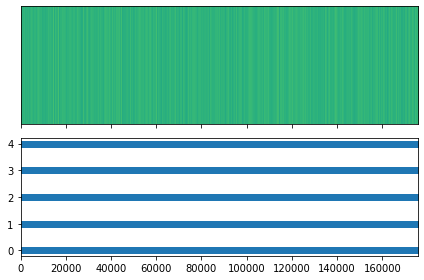

In [19]:
y = kmeans_5.predict(face_pca_n_32.transform(Xtest))
visualize_labels(y)

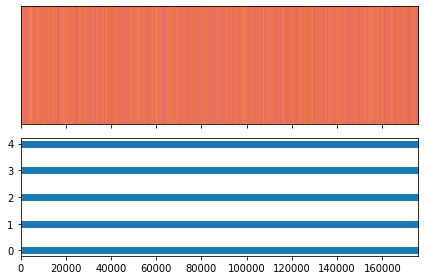

In [16]:
y = kmeans_5.predict(face_pca_n_32.transform(Xvalid))
visualize_labels(y)

In [17]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_pca.p','wb'))

In [ ]:
import keras
encoder_32 = keras.models.load_model(model_path + 'encoder_32.pb')

X_auto = encoder_32.predict(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_auto)

In [ ]:
y = kmeans_5.predict(encoder_32.predict(Test.to_numpy()[:,3:]))
visualize_labels(y)

In [ ]:
y = kmeans_5.predict(encoder_32.predict(Valid.to_numpy()[:,3:]))
visualize_labels(y)

In [ ]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_auto.p','wb'))

## Model Comparisons
Is there some way to perform a comparison across the models (I don't think there is without dynamic time warping)
- PCA-n-5
- PCA-n-32 -> KMeans-5-from-pca
- Autoencoder-32 -> KMeans-5-from-autoencoder
- Autoencoder-5